# Netflix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\shrey\\Downloads\\mymoviedb (1).csv",engine='python')
data


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [3]:
cols = ['Overview','Original_Language','Poster_Url']
data.drop(cols,axis=1,inplace=True)

In [4]:
print(data.columns)

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


# finding null values and drop it 

In [5]:
data.isnull().sum()

Release_Date     0
Title            9
Popularity      10
Vote_Count      10
Vote_Average    10
Genre           11
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data["Vote_Count"] = data["Vote_Count"].astype(int)

In [8]:
data["Vote_Average"] = data["Vote_Average"].astype(float)

In [9]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# changing data type

In [10]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  9826 non-null   datetime64[ns]
 1   Title         9826 non-null   object        
 2   Popularity    9826 non-null   float64       
 3   Vote_Count    9826 non-null   int32         
 4   Vote_Average  9826 non-null   float64       
 5   Genre         9826 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 499.0+ KB


In [12]:
data["Release_Date"] = data["Release_Date"].dt.year

In [13]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9833,2020,Violent Delights,13.356,8,3.5,Horror
9834,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9835,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


# categorize vote_average function

In [14]:
def categorize_col(data, col, labels):
    stats = data[col].describe()
    edges = [stats['min'], stats['25%'], stats['50%'], stats['75%'], stats['max'] + 0.01]
    data[col] = pd.cut(data[col], bins=edges, labels=labels, duplicates='drop')
    return data 

In [15]:
labels = ['not_popular' , 'below_average' , 'average' , 'popular']
categorize_col(data , "Vote_Average" , labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896,popular,"Drama, Crime"
9833,2020,Violent Delights,13.356,8,not_popular,Horror
9834,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9835,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


# split genre into list then explode it 

In [16]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre').reset_index(drop=True)

In [17]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,average,History
25789,1984,Threads,13.354,186,popular,War
25790,1984,Threads,13.354,186,popular,Drama


In [18]:
data.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

# data visualization

# what is the most frequent genre released on netflix

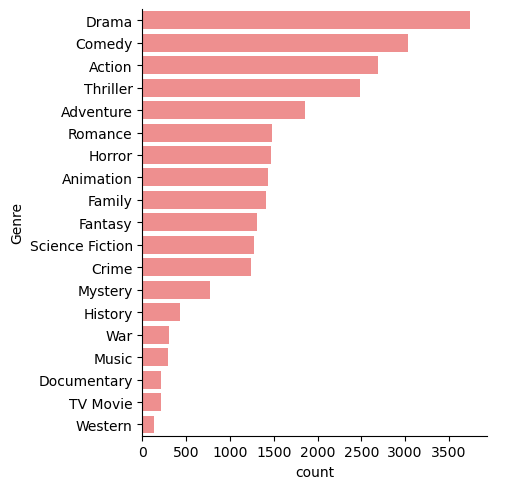

In [19]:
sns.catplot(y='Genre' , data = data , kind = 'count' , order = data['Genre'].value_counts().index,color='r',alpha=0.5)

# which has the highest vote in vote average column

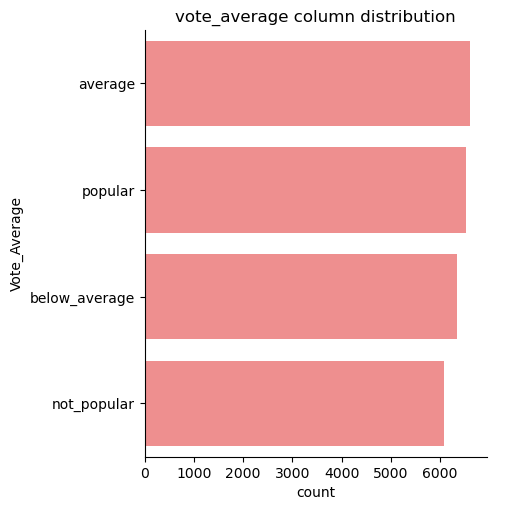

In [20]:
sns.catplot(y = 'Vote_Average' , order=data['Vote_Average'].value_counts().index , data = data , kind = 'count',color='r',alpha=0.5)
plt.title('vote_average column distribution')
plt.show()

# which movie is most popular

In [21]:
 data[data['Popularity'] == data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# which movie is least popular 

In [22]:
 data[data['Popularity'] == data['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,average,History
25789,1984,Threads,13.354,186,popular,War
25790,1984,Threads,13.354,186,popular,Drama
25791,1984,Threads,13.354,186,popular,Science Fiction


# in which year most of the movie release 

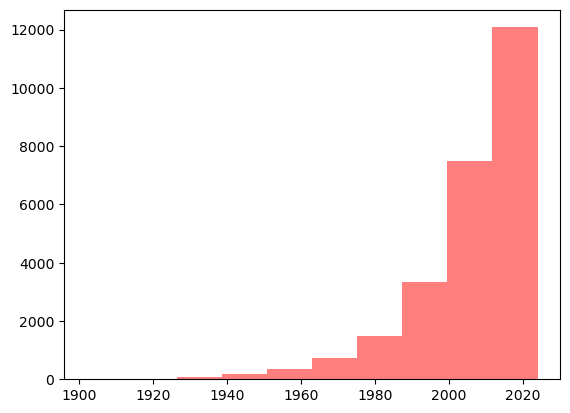

In [23]:
plt.hist(data = data , x = 'Release_Date',color='r',alpha=0.5)	
plt.show()